PROJET SCORING

Auteurs : CHEKALINA Alisa, CRISTEA Carmen, GASPARIN Lia, VO Nguyen Thao Nhi

In [2]:
# Importation des bibliothéques

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import importlib
import discretisation
importlib.reload(discretisation)
from preprocessing import Preprocessing 
from discretisation import DiscretisationCategorie, DiscretisationNumerique

from classification import EntrainerModèle, LogisticRegressionModèle, SelectionVariable
from grilledescore import ModeleGrilleDeScore

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importation de la base de données

df = pd.read_csv("data/hmeq.csv")

# Analyse descriptive et statistique

## information générale sur la base de données

In [4]:
# Nombre de lignes et de colonnes de dataset
df.shape

(5960, 13)

In [5]:
# L'information générale sur les variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [6]:
# Les statistiques descriptives des variables quantitatives
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BAD,5960.0,0.199497,0.399656,0.000000,0.000000,0.000000,0.000000,1.000000
LOAN,5960.0,18607.969799,11207.480417,1100.000000,11100.000000,16300.000000,23300.000000,89900.000000
MORTDUE,5442.0,73760.817200,44457.609458,2063.000000,46276.000000,65019.000000,91488.000000,399550.000000
VALUE,5848.0,101776.048741,57385.775334,8000.000000,66075.500000,89235.500000,119824.250000,855909.000000
YOJ,5445.0,8.922268,7.573982,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,5252.0,0.254570,0.846047,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,5380.0,0.449442,1.127266,0.000000,0.000000,0.000000,0.000000,15.000000
CLAGE,5652.0,179.766275,85.810092,0.000000,115.116702,173.466667,231.562278,1168.233561
NINQ,5450.0,1.186055,1.728675,0.000000,0.000000,1.000000,2.000000,17.000000
CLNO,5738.0,21.296096,10.138933,0.000000,15.000000,20.000000,26.000000,71.000000


In [7]:
# Vérifier s'il y a des doublons
doublons = df.duplicated()
nb_doublons = doublons.sum()
print(f"Nombre de doublons : {nb_doublons}")

Nombre de doublons : 0


In [8]:
# Valeurs numériques et catégorielles
numeric_cols = df.select_dtypes(include=['number']).columns
categ_cols = df.select_dtypes(exclude=['number']).columns

print(f"les colonnes numériques : {numeric_cols}")
print(f"les colonnes catégorielles : {categ_cols}")

les colonnes numériques : Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE',
       'NINQ', 'CLNO', 'DEBTINC'],
      dtype='object')
les colonnes catégorielles : Index(['REASON', 'JOB'], dtype='object')


In [9]:
#L'information sur chaque variable
for col in categ_cols:
    nb_of_no_na = df[col].notnull().sum()
    zero_values = (df[col] == 0).sum()
    na_values = df[col].isnull().sum()
    percent_na_values = round((df[col].isnull().sum()/len(df[col]))*100, 2)
    unique_values = len(df[col].unique())


    print("information plus profonde sur les variables")
    print("_"*40)
    print(f"Variable: {col}")
    print(f"La quantité des valeurs non manquantes: {nb_of_no_na}")
    print(f"La quantité des valeurs égales à 0: {zero_values}")
    print(f"La quantité des valeurs manquantes: {na_values}")
    print(f"le pourcentage des valeurs manquantes : {percent_na_values}%")
    print(f"Les valeurs uniques: {unique_values}")
    print("_"*40)


for col in numeric_cols:
    nb_of_no_na = df[col].notnull().sum()
    zero_values = (df[col] == 0).sum()
    na_values = df[col].isnull().sum()
    percent_na_values = round((df[col].isnull().sum()/len(df[col]))*100, 2)
    unique_values = len(df[col].unique())


    print("_"*40)
    print(f"Variable: {col}")
    print(f"La quantité des valeurs non manquantes: {nb_of_no_na}")
    print(f"La quantité des valeurs égales à 0: {zero_values}")
    print(f"La quantité des valeurs manquates: {na_values}")
    print(f"le pourcentage des valeurs manquantes : {percent_na_values}%")
    print(f"Les valeurs uniques: {unique_values}")
    print("_"*40)

information plus profonde sur les variables
________________________________________
Variable: REASON
La quantité des valeurs non manquantes: 5708
La quantité des valeurs égales à 0: 0
La quantité des valeurs manquantes: 252
le pourcentage des valeurs manquantes : 4.23%
Les valeurs uniques: 3
________________________________________
information plus profonde sur les variables
________________________________________
Variable: JOB
La quantité des valeurs non manquantes: 5681
La quantité des valeurs égales à 0: 0
La quantité des valeurs manquantes: 279
le pourcentage des valeurs manquantes : 4.68%
Les valeurs uniques: 7
________________________________________
________________________________________
Variable: BAD
La quantité des valeurs non manquantes: 5960
La quantité des valeurs égales à 0: 4771
La quantité des valeurs manquates: 0
le pourcentage des valeurs manquantes : 0.0%
Les valeurs uniques: 2
________________________________________
________________________________________
Varia

## Les distributions

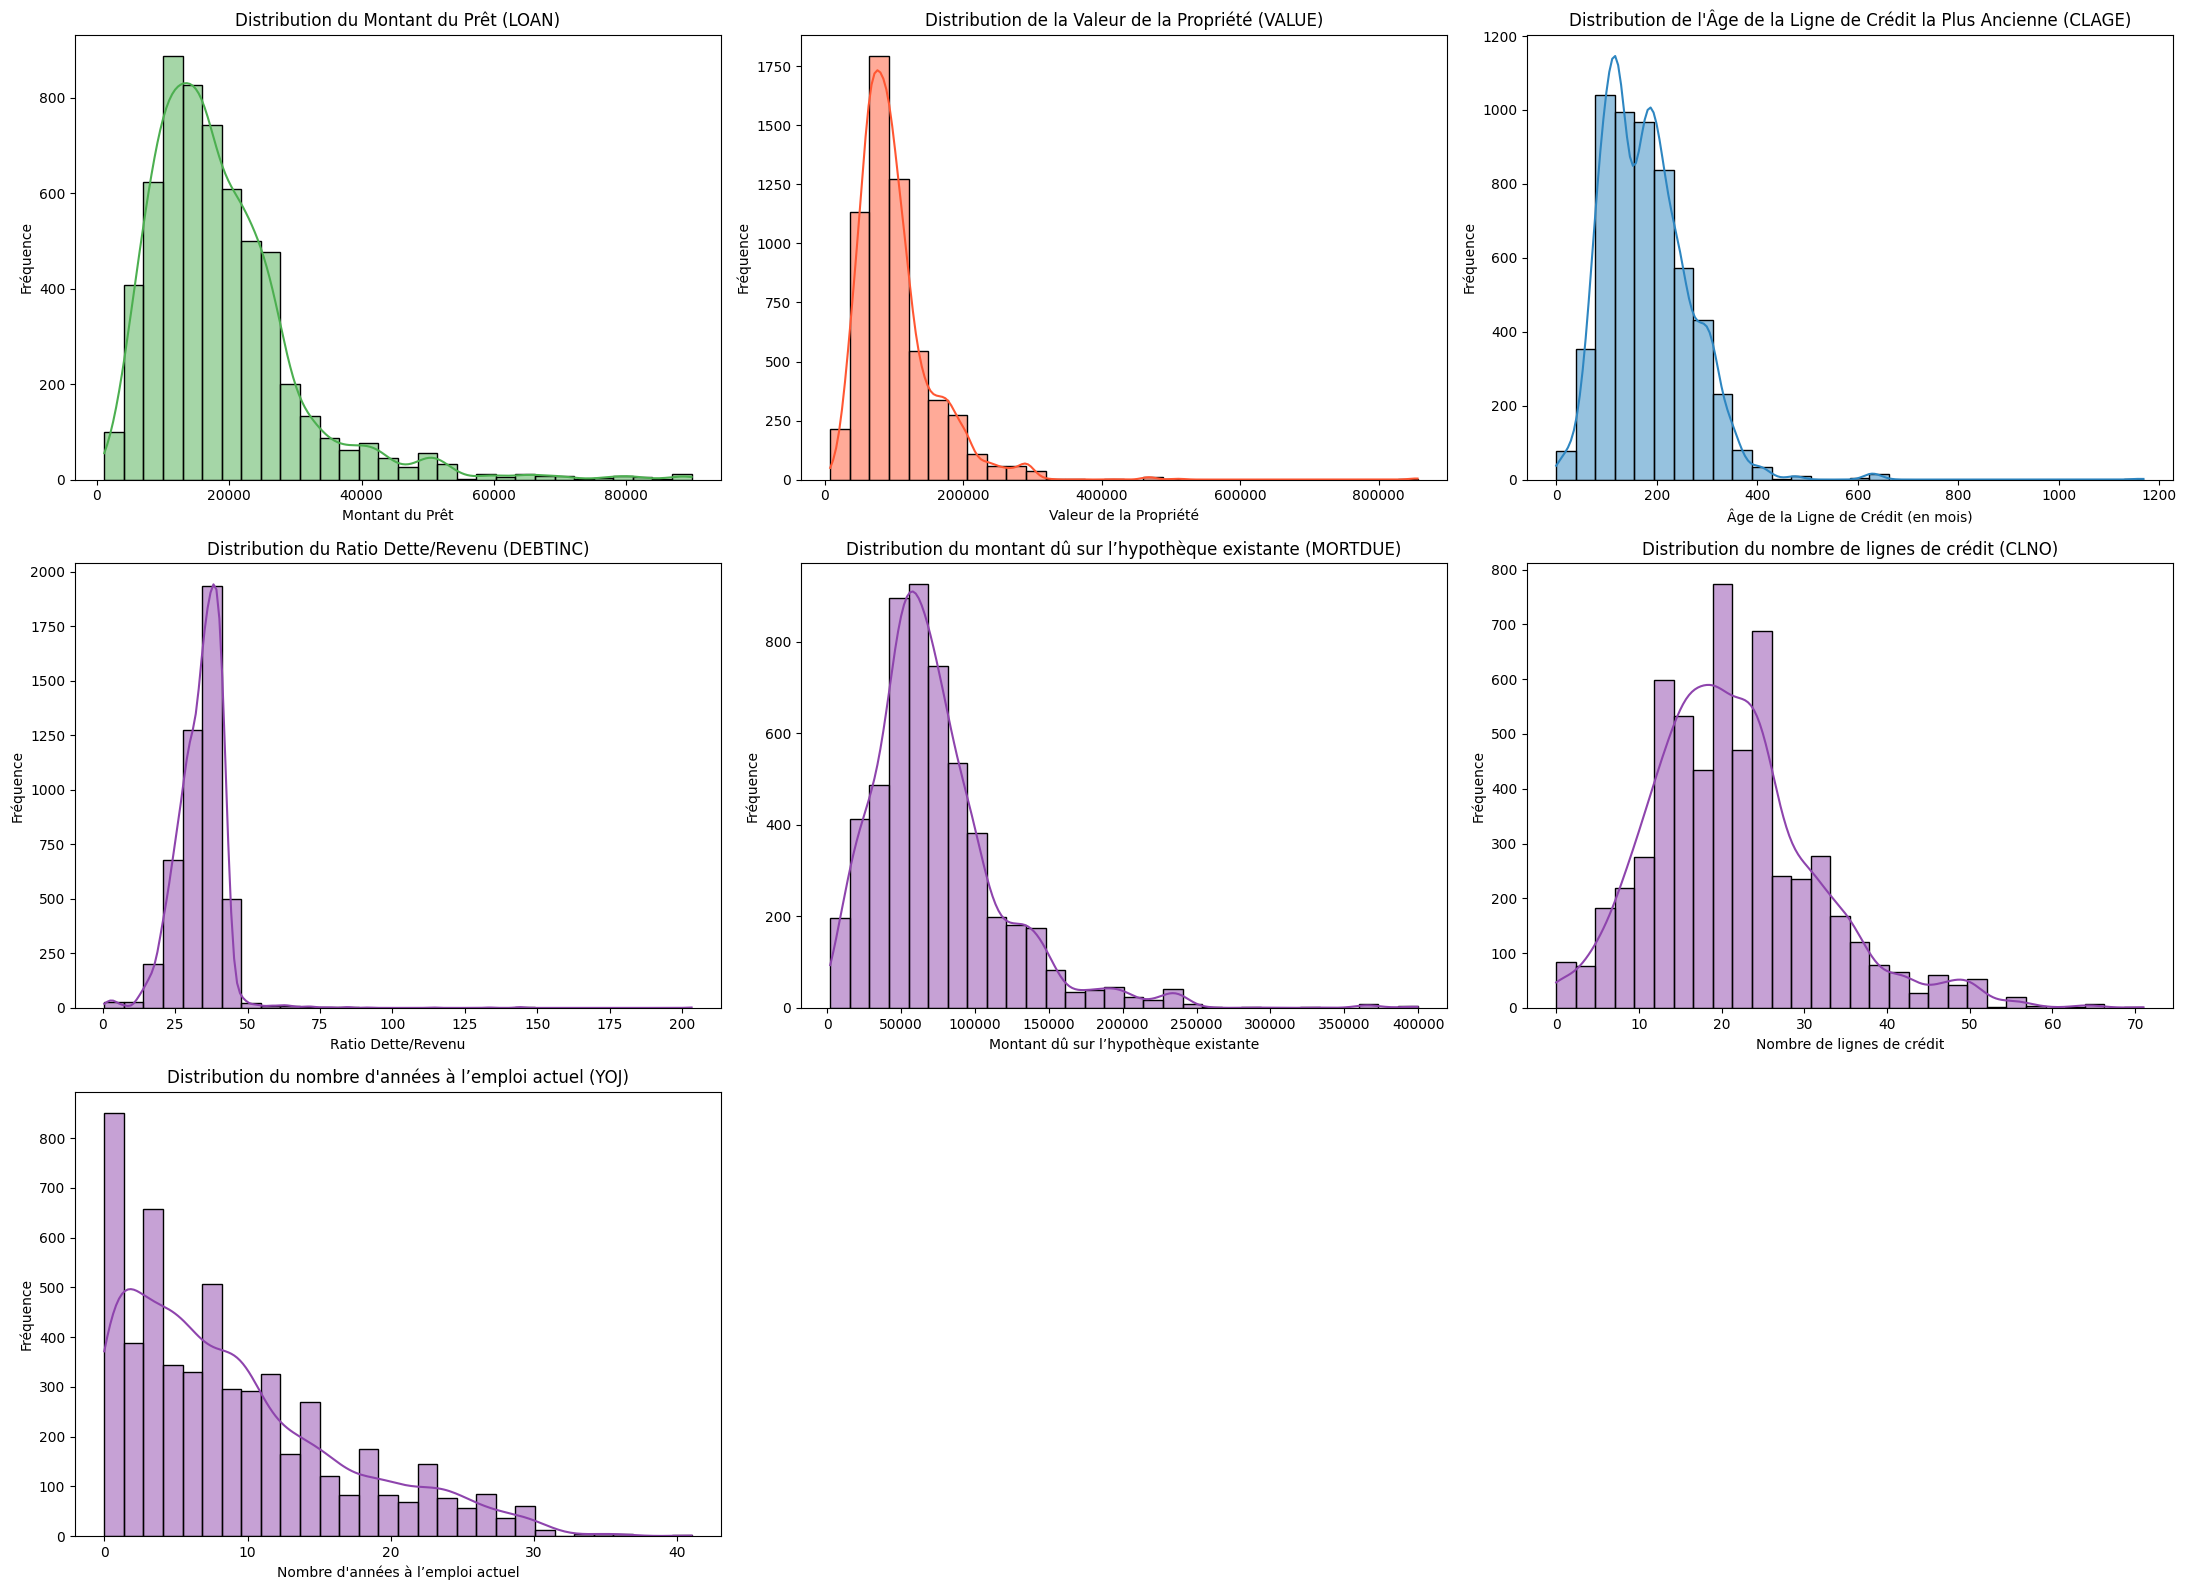

In [10]:
# Distributions des variables continues

plt.figure(figsize=(22, 16))

# Distribution de LOAN
plt.subplot(3, 3, 1)
sns.histplot(df['LOAN'], kde=True, color='#4CAF50', bins=30)
plt.title('Distribution du Montant du Prêt (LOAN)')
plt.xlabel('Montant du Prêt')
plt.ylabel('Fréquence')

# Distribution de VALUE
plt.subplot(3, 3, 2)
sns.histplot(df['VALUE'], kde=True, color='#FF5733', bins=30)
plt.title('Distribution de la Valeur de la Propriété (VALUE)')
plt.xlabel('Valeur de la Propriété')
plt.ylabel('Fréquence')

# Distribution de CLAGE
plt.subplot(3, 3, 3)
sns.histplot(df['CLAGE'], kde=True, color='#2E86C1', bins=30)
plt.title('Distribution de l\'Âge de la Ligne de Crédit la Plus Ancienne (CLAGE)')
plt.xlabel('Âge de la Ligne de Crédit (en mois)')
plt.ylabel('Fréquence')

# Distribution de DEBTINC
plt.subplot(3, 3, 4)
sns.histplot(df['DEBTINC'], kde=True, color='#8E44AD', bins=30)
plt.title('Distribution du Ratio Dette/Revenu (DEBTINC)')
plt.xlabel('Ratio Dette/Revenu')
plt.ylabel('Fréquence')

# Distribution de MORTDUE
plt.subplot(3, 3, 5)
sns.histplot(df['MORTDUE'], kde=True, color='#8E44AD', bins=30)
plt.title('Distribution du montant dû sur l’hypothèque existante (MORTDUE)')
plt.xlabel('Montant dû sur l’hypothèque existante')
plt.ylabel('Fréquence')

# Distribution de CLNO
plt.subplot(3, 3, 6)
sns.histplot(df['CLNO'], kde=True, color='#8E44AD', bins=30)
plt.title('Distribution du nombre de lignes de crédit (CLNO)')
plt.xlabel('Nombre de lignes de crédit')
plt.ylabel('Fréquence')

# Distribution de YOJ
plt.subplot(3, 3, 7)
sns.histplot(df['YOJ'], kde=True, color='#8E44AD', bins=30)
plt.title("Distribution du nombre d'années à l’emploi actuel (YOJ)")
plt.xlabel("Nombre d'années à l’emploi actuel")
plt.ylabel('Fréquence')


plt.tight_layout()
plt.show()

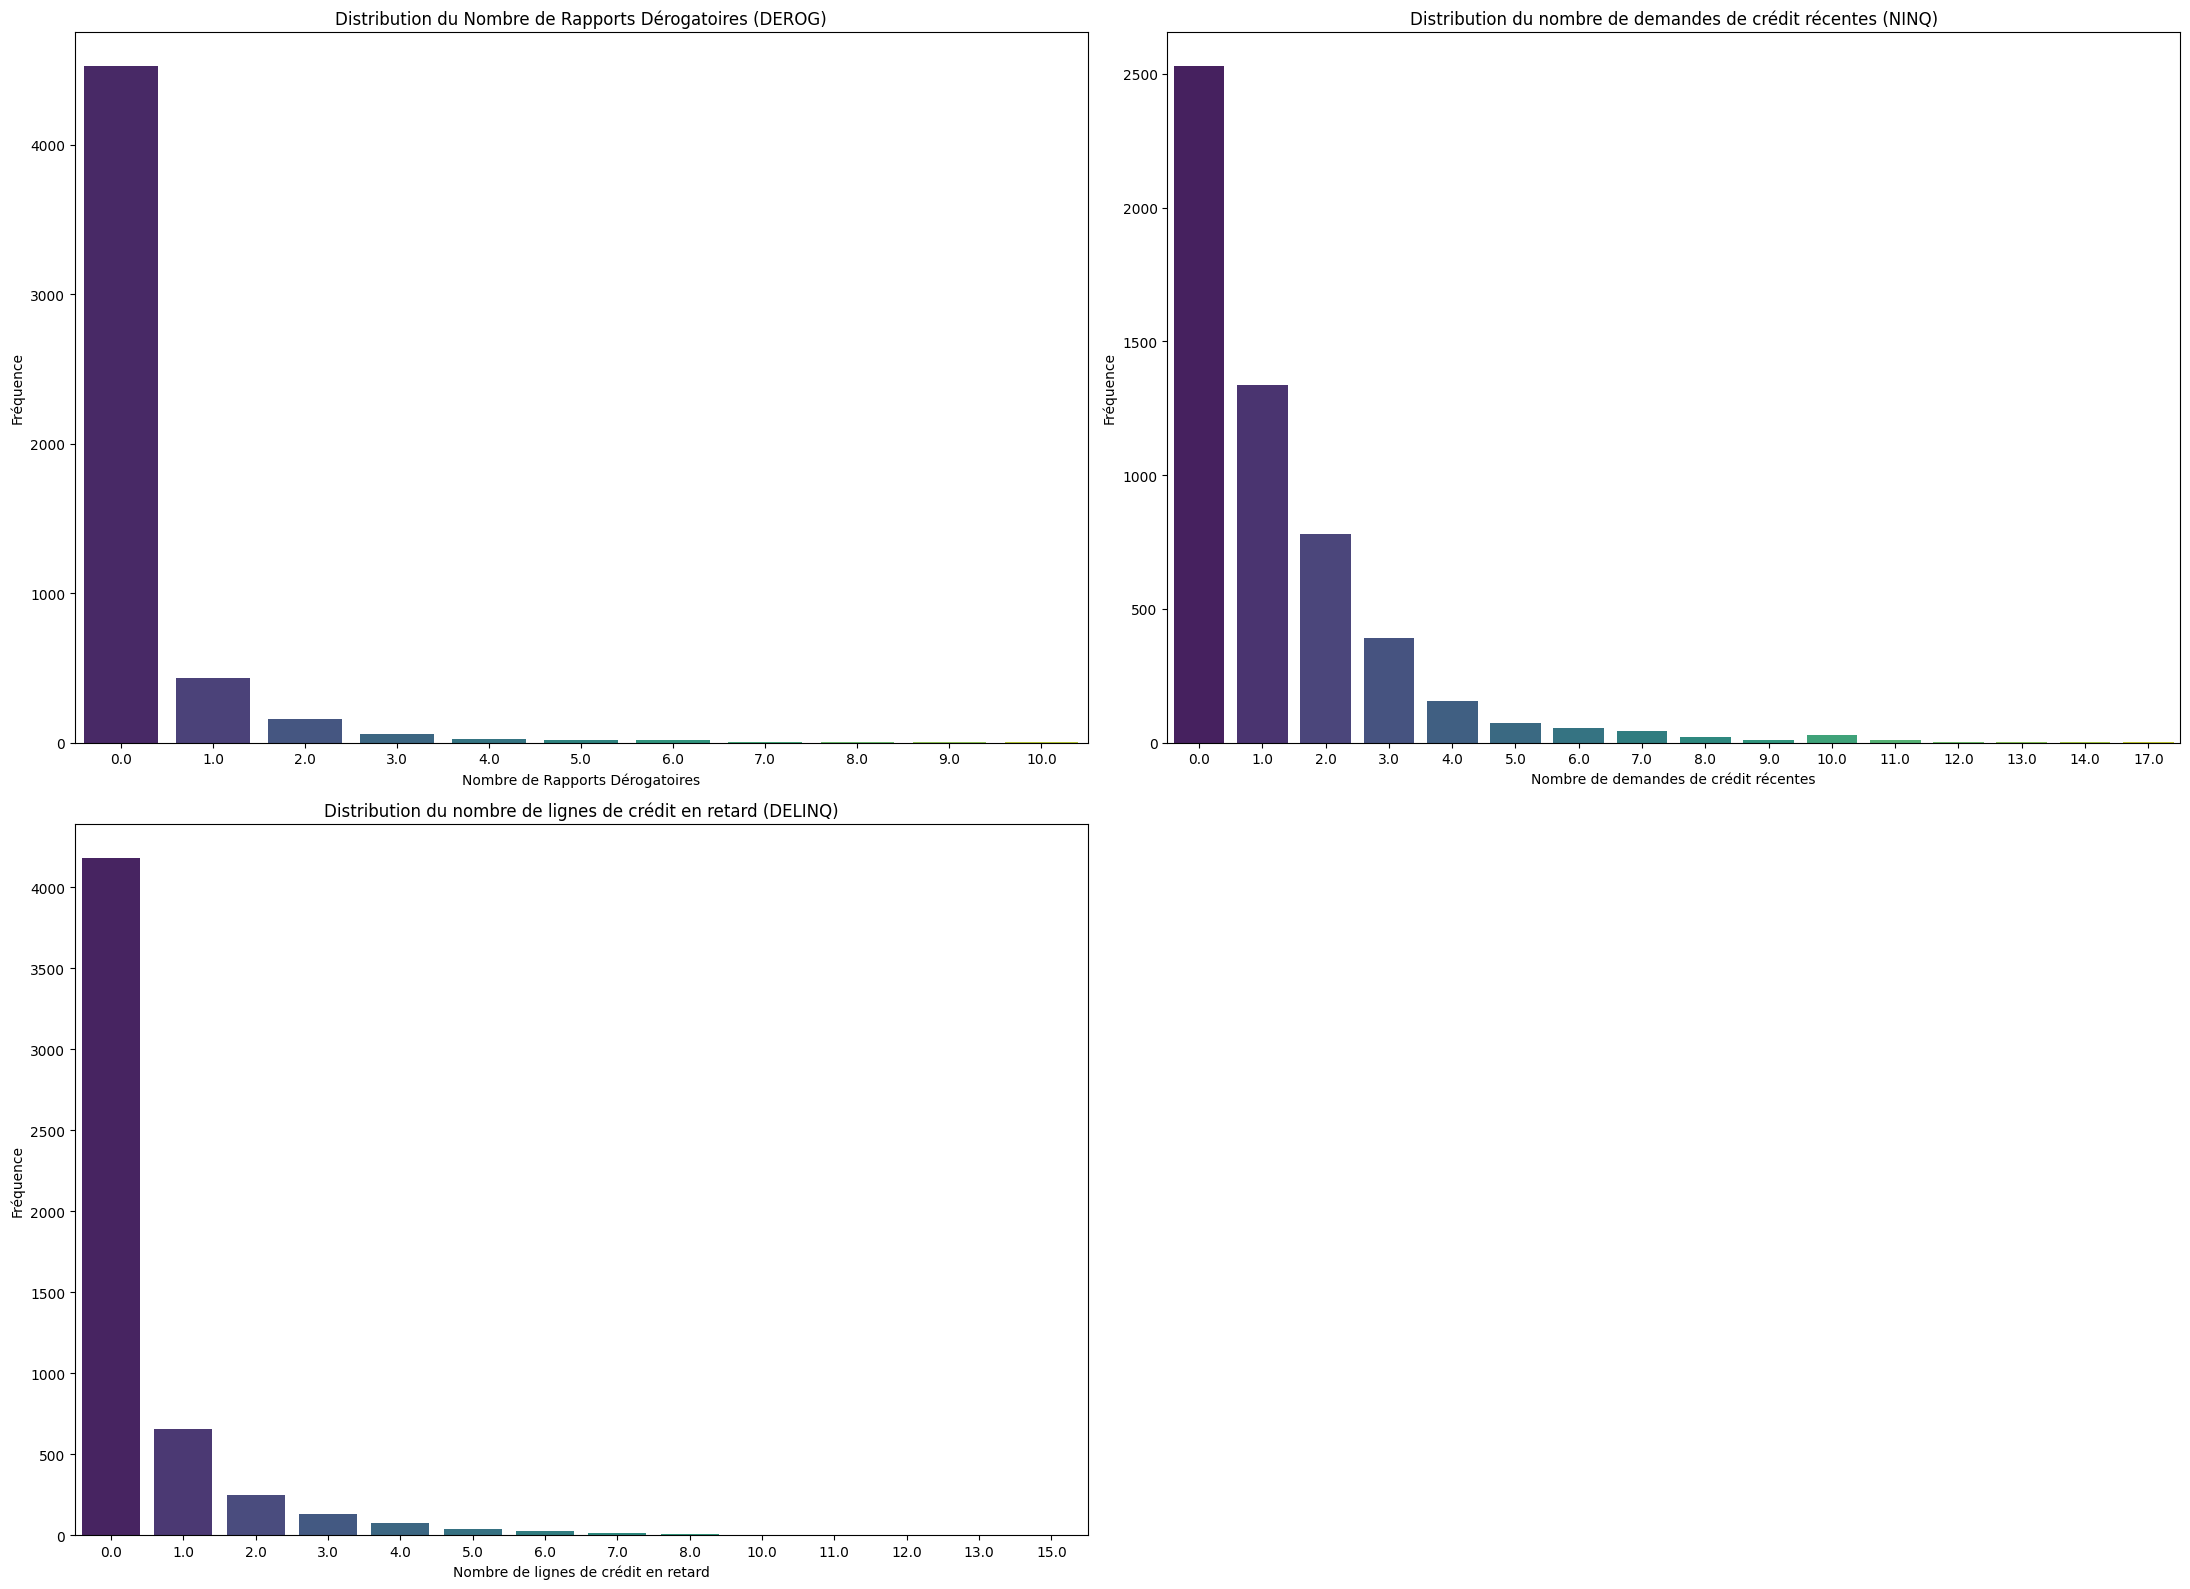

In [11]:
# Distributions des variables integer

plt.figure(figsize=(22, 16))

# Distribution de DEROG
plt.subplot(2, 2, 1)
sns.countplot(x='DEROG', data=df, palette='viridis')
plt.title('Distribution du Nombre de Rapports Dérogatoires (DEROG)')
plt.xlabel('Nombre de Rapports Dérogatoires')
plt.ylabel('Fréquence')

# Distribution de NINQ
plt.subplot(2, 2, 2)
sns.countplot(x='NINQ', data=df, palette='viridis')
plt.title('Distribution du nombre de demandes de crédit récentes (NINQ)')
plt.xlabel('Nombre de demandes de crédit récentes')
plt.ylabel('Fréquence')

# Distribution de DELINQ
plt.subplot(2, 2, 3)
sns.countplot(x='DELINQ', data=df, palette='viridis')
plt.title("Distribution du nombre de lignes de crédit en retard (DELINQ)")
plt.xlabel("Nombre de lignes de crédit en retard")
plt.ylabel('Fréquence')

plt.tight_layout()
plt.show()

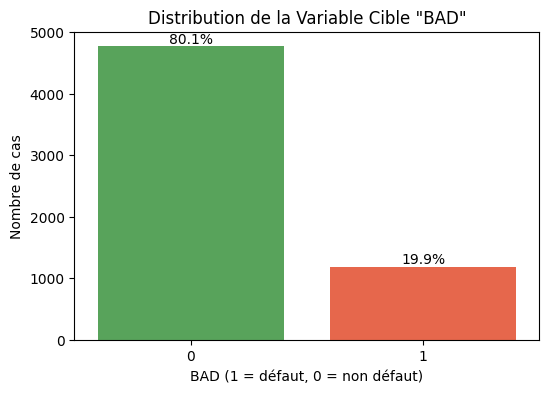

In [12]:
# Distribution d'une variable cible BAD

plt.figure(figsize=(6, 4))
total = len(df)
ax = sns.countplot(x='BAD', data=df, palette=['#4CAF50', '#FF5733'])  # Couleurs personnalisées

for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'  # Calcul du pourcentage
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')  # Ajout de l'annotation

plt.title('Distribution de la Variable Cible "BAD"')
plt.xlabel('BAD (1 = défaut, 0 = non défaut)')
plt.ylabel('Nombre de cas')
plt.show()

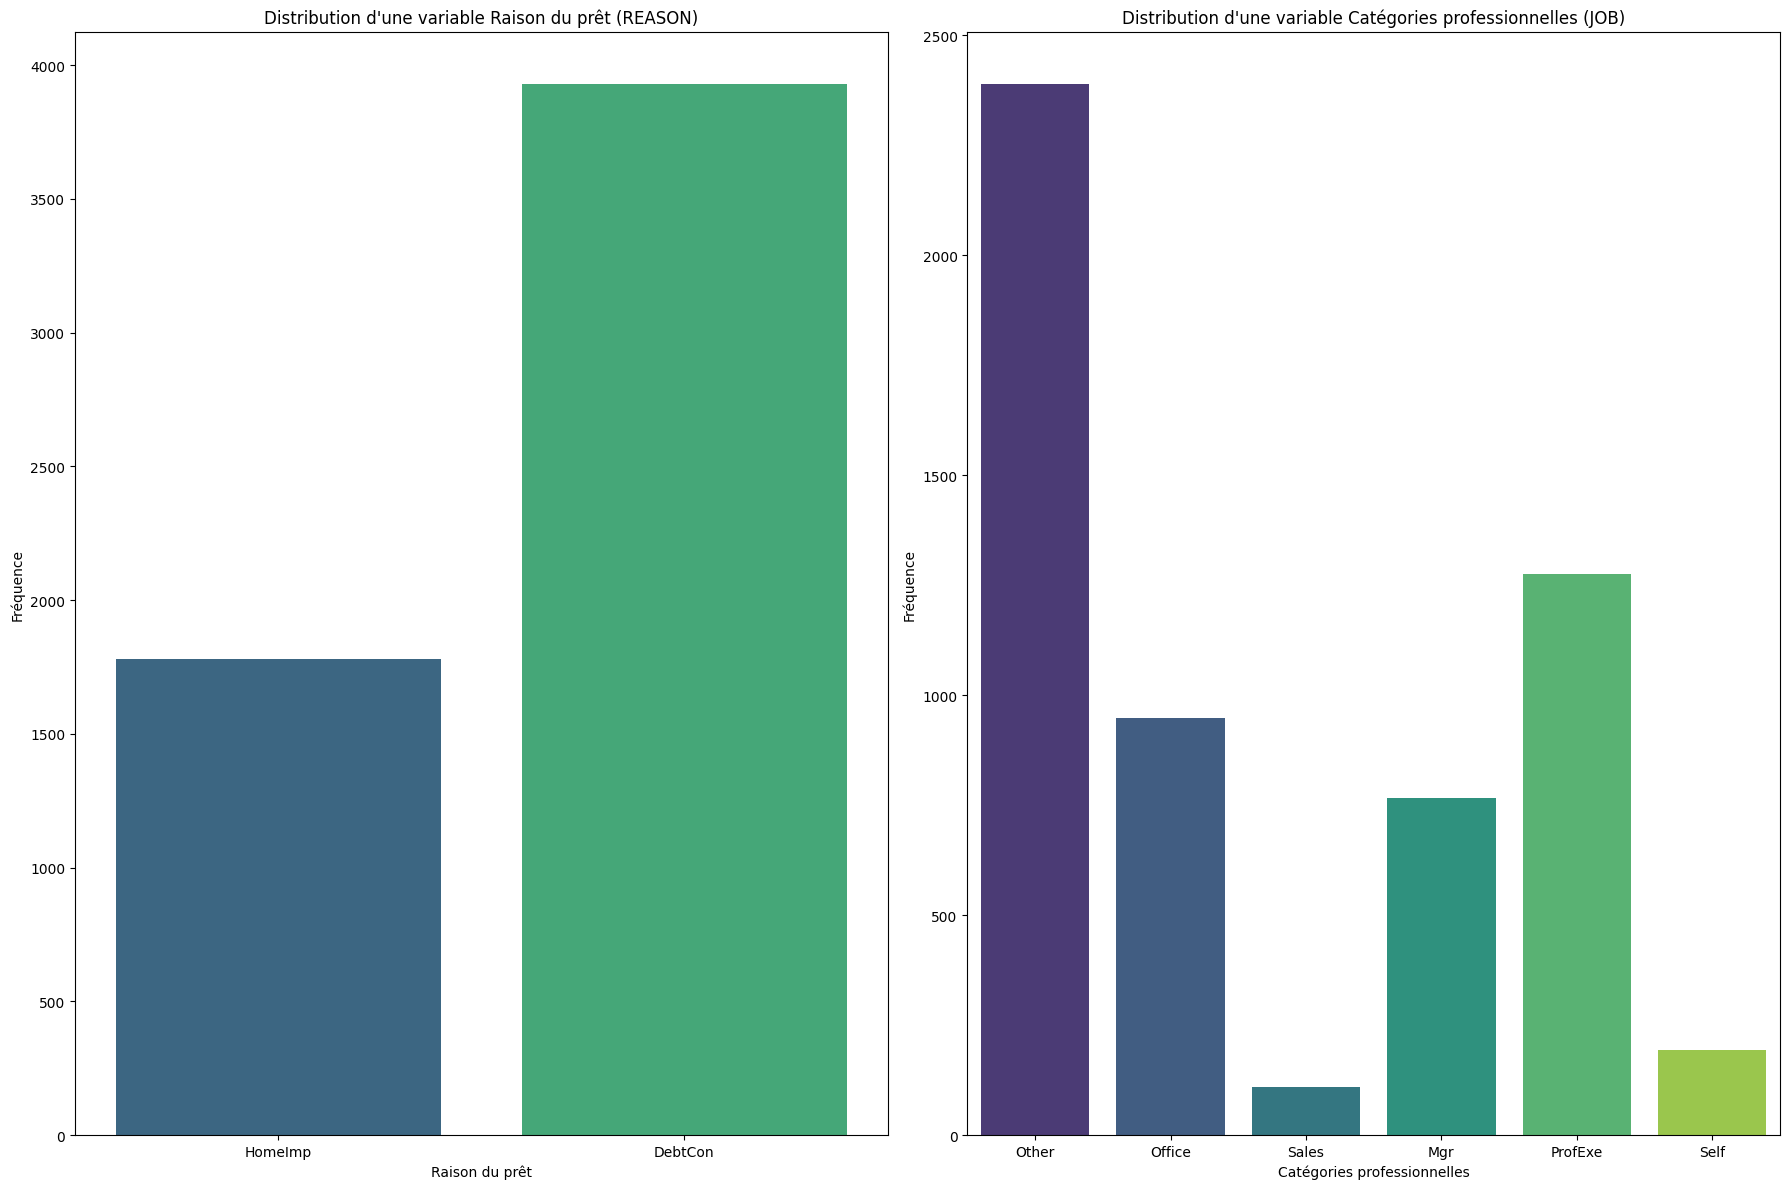

In [13]:
# Distributions des variables catégorielles

plt.figure(figsize=(18, 12))

#Distribution de REASON
plt.subplot(1, 2, 1)
sns.countplot(x='REASON', data=df, palette='viridis')
plt.title("Distribution d'une variable Raison du prêt (REASON)")
plt.xlabel('Raison du prêt')
plt.ylabel('Fréquence')

# Distribution de JOB
plt.subplot(1, 2, 2)
sns.countplot(x='JOB', data=df, palette='viridis')
plt.title("Distribution d'une variable Catégories professionnelles (JOB)")
plt.xlabel('Catégories professionnelles')
plt.ylabel('Fréquence')

plt.tight_layout()
plt.show()

## Analyse de corrélation

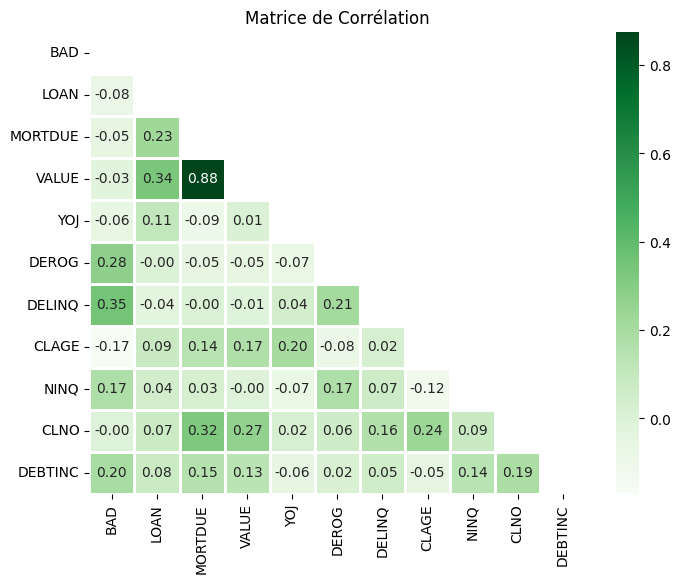

In [14]:
corr_matrix = df[numeric_cols].corr()

# Visualisation de la matrice de corrélation
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, cmap='Greens',linewidths=1,mask=np.triu(corr_matrix),fmt = '.2f', annot=True)
plt.title('Matrice de Corrélation')
plt.show()

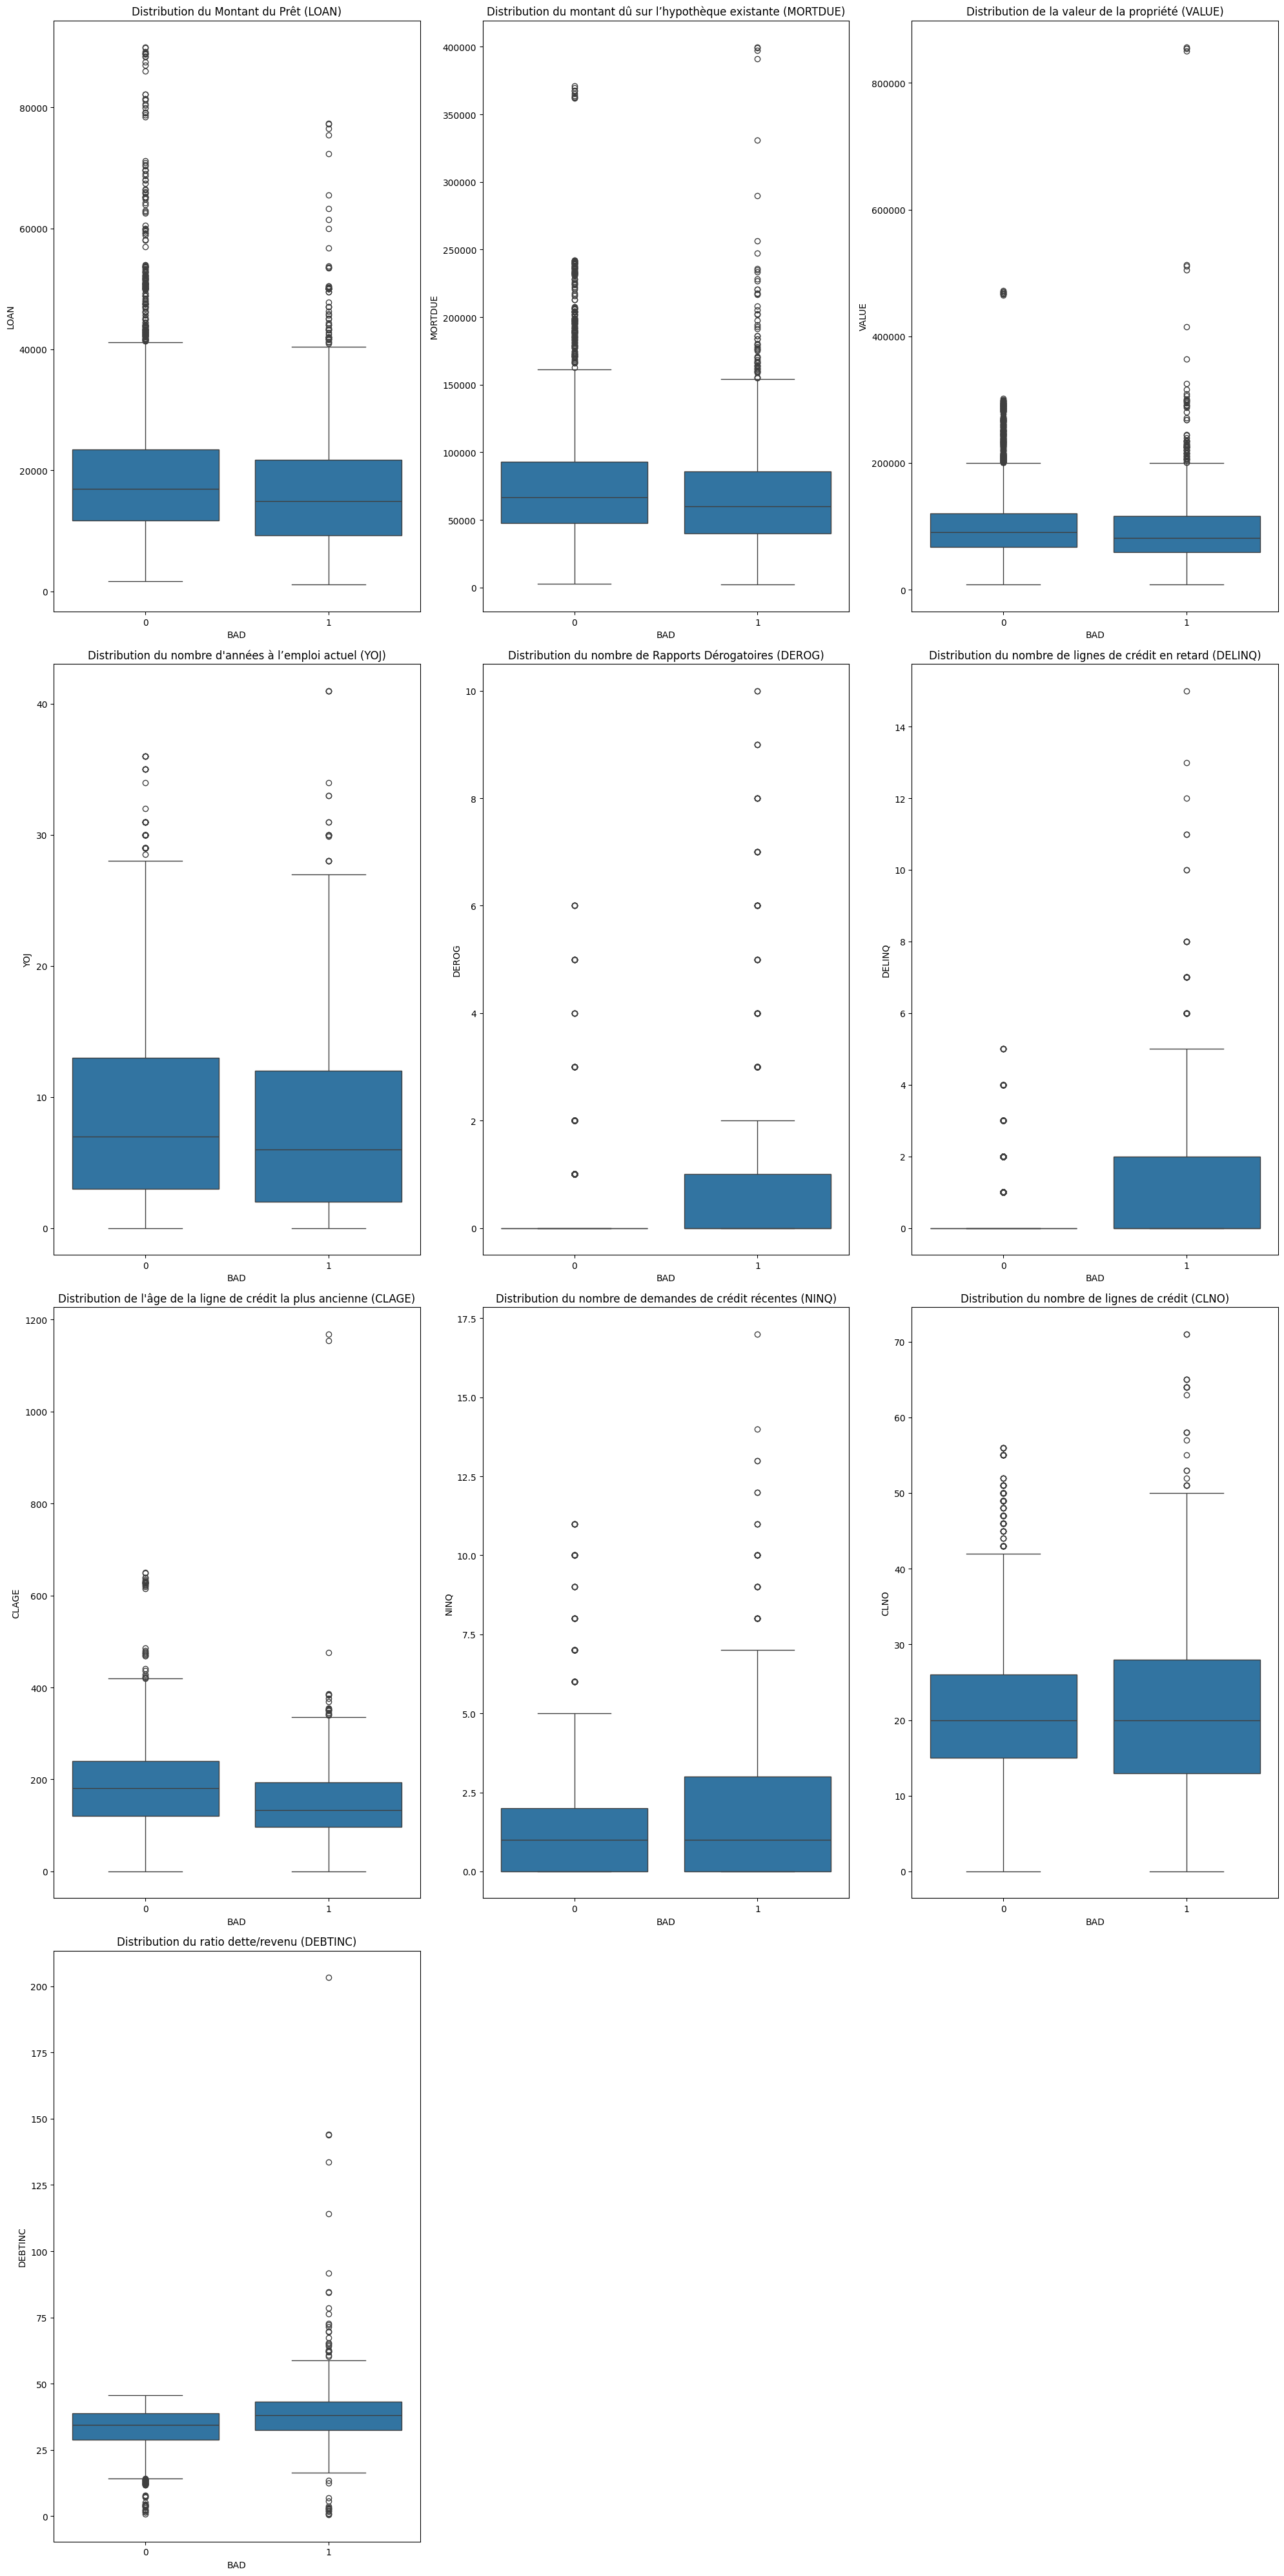

In [15]:

plt.figure(figsize=(20, 40))

# Distribution de LOAN en fonction de BAD
plt.subplot(4, 3, 1)
sns.boxplot(x="BAD", y = "LOAN", data=df)
plt.title('Distribution du Montant du Prêt (LOAN)')

# Distribution de MORTDUE en fonction de BAD
plt.subplot(4, 3, 2)
sns.boxplot(x="BAD", y = "MORTDUE", data=df)
plt.title('Distribution du montant dû sur l’hypothèque existante (MORTDUE)')

# Distribution de VALUE en fonction de BAD
plt.subplot(4, 3, 3)
sns.boxplot(x="BAD", y = "VALUE", data=df)
plt.title('Distribution de la valeur de la propriété (VALUE)')

# Distribution de YOJ en fonction de BAD
plt.subplot(4, 3, 4)
sns.boxplot(x="BAD", y = "YOJ", data=df)
plt.title('Distribution du nombre d\'années à l’emploi actuel (YOJ)')

# Distribution de DEROG en fonction de BAD
plt.subplot(4, 3, 5)
sns.boxplot(x="BAD", y = "DEROG", data=df)
plt.title('Distribution du nombre de Rapports Dérogatoires (DEROG)')

# Distribution de DELINQ en fonction de BAD
plt.subplot(4, 3, 6)
sns.boxplot(x="BAD", y = "DELINQ", data=df)
plt.title('Distribution du nombre de lignes de crédit en retard (DELINQ)')

# Distribution de CLAGE en fonction de BAD
plt.subplot(4, 3, 7)
sns.boxplot(x="BAD", y = "CLAGE", data=df)
plt.title('Distribution de l\'âge de la ligne de crédit la plus ancienne (CLAGE)')

# Distribution de NINQ en fonction de BAD
plt.subplot(4, 3, 8)
sns.boxplot(x="BAD", y = "NINQ", data=df)
plt.title('Distribution du nombre de demandes de crédit récentes (NINQ)')

# Distribution de CLNO en fonction de BAD
plt.subplot(4, 3, 9)
sns.boxplot(x="BAD", y = "CLNO", data=df)
plt.title('Distribution du nombre de lignes de crédit (CLNO)')
#on touche pas

# Distribution de DEBTINC en fonction de BAD
plt.subplot(4, 3, 10)
sns.boxplot(x="BAD", y = "DEBTINC", data=df)
plt.title('Distribution du ratio dette/revenu (DEBTINC)')


plt.tight_layout()
plt.show()

# Traitement des valeurs manquantes

In [16]:
# Division en train test
train, test = train_test_split(df, test_size=0.2, random_state=0)

Nous divisons notre base de données en ensembles d'entraînement (train) et de test avant de réaliser toutes les manipulations, afin d'éviter de biaiser les résultats sur l'ensemble de test.

## Imputation des variables catégorielles

In [17]:
# Imputation par la mode des variables catégorielles
prep = Preprocessing()
train_imputed = prep.imputation_par_mode_train(train, categ_cols)
test_imputed = prep.imputation_par_mode_test(test, categ_cols)

Nous imputons les données de test en utilisant la mode calculée à partir de l'ensemble d'entraînement

In [18]:
#vérification
train_imputed.isna().sum()

BAD           0
LOAN          0
MORTDUE     419
VALUE        88
REASON        0
JOB           0
YOJ         423
DEROG       564
DELINQ      453
CLAGE       246
NINQ        408
CLNO        173
DEBTINC    1023
dtype: int64

## Imputation des variables numériques


In [19]:
# Imputation des variables numériques pour le train
variables_à_imputer = ['MORTDUE', 'VALUE', 'DELINQ', 'CLAGE', 'NINQ', 'YOJ', 'CLNO', 'DEROG', "DEBTINC"]
train_imputed = prep.imputation_par_regression_train(train_imputed, variables_à_imputer, categ_cols)

In [20]:
# Vérification
train_imputed.isna().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
REASON     0
JOB        0
dtype: int64

In [21]:
# Imputation des variables numériques pour le test
test_imputed = prep.imputation_par_regression_test(test, variables_à_imputer, categ_cols)

In [22]:
# Vérification
train_imputed.isna().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
REASON     0
JOB        0
dtype: int64

In [23]:
# Arrondir les variables integer pour laisser le même type des variables
liste_col_int = ["NINQ", "DEROG", "DELINQ", "CLNO"]
train_imputed = prep.arondir_les_variables_prédites(train_imputed, liste_col_int)

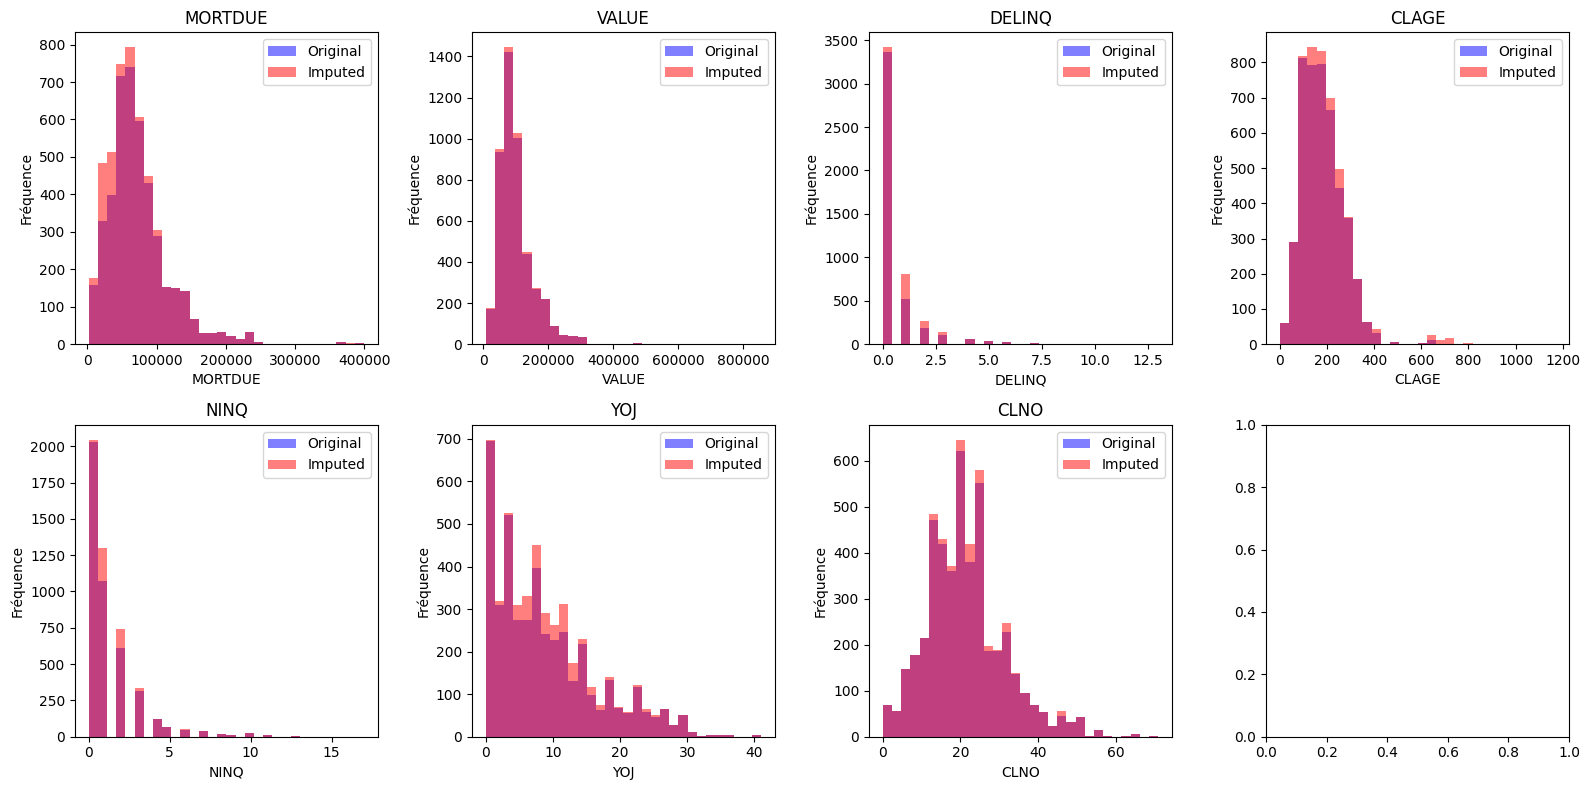

In [24]:
# Comparaison des distributions
variables = ['MORTDUE', 'VALUE', 'DELINQ', 'CLAGE', 'NINQ', 'YOJ', 'CLNO']

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

axes = axes.flatten()


for i, variable in enumerate(variables):

    axes[i].hist(train[variable], bins=30, alpha=0.5, label='Original', color='blue')
    axes[i].hist(train_imputed[variable], bins=30, alpha=0.5, label='Imputed', color='red')
    
    axes[i].set_title(variable)
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('Fréquence')
    
    axes[i].legend()

plt.tight_layout()

plt.show()


# Features Engineering

In [25]:
train_imputed['CLAGE_YEAR']= train_imputed['CLAGE'] / 12
test_imputed['CLAGE_YEAR'] = test_imputed['CLAGE'] / 12

# Discrétisation

## Discrétisation des variables catégorielles

In [26]:

disc_categorie = DiscretisationCategorie()

# Discrétisation sur train
train_discret_categorical, discretisation_mapping = disc_categorie.discretisation_de_variable_categorielle_train(train_imputed, 'JOB', 'BAD')

# Appliquer la discrétisation sur le test
test_discret_categorical = disc_categorie.appliquer_discretisation_test(test_imputed, 'JOB', discretisation_mapping)

  Categorie  Taux_default    Classe
0    Office      0.137435  classe_1
1   ProfExe      0.170898  classe_1
2     Other      0.213107  classe_2
3       Mgr      0.230146  classe_2
4      Self      0.285714  classe_3
5     Sales      0.375000  classe_3


In [27]:
# Calcul de coefficient de Tschuprow pour JOB
disc_categorie.tshuprow_coef_calcul(train_discret_categorical, ['JOB'], 'BAD')

Coefficient de Tschuprow pour JOB : 0.0711


In [28]:
# Calcul de coefficient de Tschuprow pour JOB_discret
disc_categorie.tshuprow_coef_calcul(train_discret_categorical, ['JOB_discret'], 'BAD')

Coefficient de Tschuprow pour JOB_discret : 0.0836


In [29]:
# Regarder la distribution
test_discret_categorical['JOB_discret'].value_counts(normalize = True)

JOB_discret
classe_2    0.583893
classe_1    0.365772
classe_3    0.050336
Name: proportion, dtype: float64

on voit que tous les classes sont > à 5%, donc, nous pouvons laisser la discrétisation

In [30]:
# L'encodage d'une variable "JOB_discret"

mapping = {'classe_1': 0, 'classe_2': 1, 'classe_3': 2}
train_discret_categorical["JOB_discret"] = train_discret_categorical["JOB_discret"].map(mapping)
train_discret_categorical["JOB_discret"] = train_discret_categorical["JOB_discret"].astype(int)

test_discret_categorical["JOB_discret"] = test_discret_categorical["JOB_discret"].map(mapping)
test_discret_categorical["JOB_discret"] = test_discret_categorical["JOB_discret"].astype(int)

## Discrétisation des variables numériques

In [31]:
disc = DiscretisationNumerique()
variables_numeriques = ['LOAN', 'MORTDUE', 'VALUE', 'CLAGE_YEAR', 'DELINQ', 'NINQ', 'YOJ', 'CLNO', 'DEROG', 'DEBTINC']
target = 'BAD'
# Discrétisation des données de train avec OptimBinning et application sur le test 
train_binned, test_binned = disc.appliquer_optimal_binning(train_discret_categorical, test_discret_categorical, variables_numeriques, target)

# Affichage des distributions des variables discrétisées, leur WoE et IV


Binning for variable: LOAN
                         Bin  Count (%)       WoE        IV
0            (-inf, 6050.00)   0.056628 -1.330429  0.134817
1        [6050.00, 15050.00)   0.384857  -0.11225  0.005013
2       [15050.00, 25050.00)   0.359060  0.290062  0.027610
3       [25050.00, 37950.00)   0.139262  0.656288  0.048652
4            [37950.00, inf)   0.060193 -0.350608  0.008177
5                    Special   0.000000       0.0  0.000000
6                    Missing   0.000000       0.0  0.000000
Totals                         1.000000            0.224269

Binning for variable: MORTDUE
                         Bin  Count (%)       WoE        IV
0           (-inf, 25191.30)   0.108221 -0.372151  0.016660
1       [25191.30, 42358.79)   0.144505 -0.144392  0.003144
2       [42358.79, 70343.00)   0.337248 -0.054705  0.001026
3       [70343.00, 76356.00)   0.059983  0.186534  0.001971
4            [76356.00, inf)   0.350042  0.229108  0.017120
5                    Special   0.000000  

## Ajustement des bases de données pour la modélisation

In [32]:
# Les tables avec les variables continues
train_normal = train_binned[['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC', 'CLAGE_YEAR']]

test_normal = test_binned[['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC', 'CLAGE_YEAR']]

In [33]:
# Suppréssion des variables continues et des variables non encodées pour les tables discrétisées
train_binned = train_binned.drop(columns=['LOAN', 'CLAGE','MORTDUE', 'VALUE', 'CLAGE_YEAR', 'DELINQ', 'NINQ', 'YOJ', 'CLNO', 'DEROG', 'DEBTINC', 'JOB', 'LOAN_binned', 'MORTDUE_binned', 'VALUE_binned', 'CLAGE_YEAR_binned',
          'DELINQ_binned', 'NINQ_binned', 'YOJ_binned', 'CLNO_binned',
          'DEROG_binned', 'DEBTINC_binned'])

test_binned = test_binned.drop(columns=['LOAN', 'CLAGE','MORTDUE', 'VALUE', 'CLAGE_YEAR', 'DELINQ', 'NINQ', 'YOJ', 'CLNO', 'DEROG', 'DEBTINC', 'JOB', 'LOAN_binned', 'MORTDUE_binned', 'VALUE_binned', 'CLAGE_YEAR_binned',
          'DELINQ_binned', 'NINQ_binned', 'YOJ_binned', 'CLNO_binned',
          'DEROG_binned', 'DEBTINC_binned'])

In [34]:
# Changement des noms des variables pour faciliter l'analyse 
train_binned = train_binned.rename(columns=lambda x: x.replace('_encoded', '') if '_encoded' in x else x)

test_binned = test_binned.rename(columns=lambda x: x.replace('_encoded', '') if '_encoded' in x else x)

In [35]:
# One hot encoding d'une variable "REASON"
train_binned = pd.get_dummies(train_binned, columns=['REASON'], drop_first=False)
test_binned = pd.get_dummies(test_binned, columns=['REASON'], drop_first=False)
train_binned['REASON_DebtCon'] = train_binned['REASON_DebtCon'].astype(int)
train_binned['REASON_HomeImp'] = train_binned['REASON_HomeImp'].astype(int)
test_binned['REASON_DebtCon'] = test_binned['REASON_DebtCon'].astype(int)
test_binned['REASON_HomeImp'] = test_binned['REASON_HomeImp'].astype(int)

In [36]:
# Vérification
train_binned.dtypes

BAD                  int64
JOB_discret          int64
LOAN_binned          int64
MORTDUE_binned       int64
VALUE_binned         int64
CLAGE_YEAR_binned    int64
DELINQ_binned        int64
NINQ_binned          int64
YOJ_binned           int64
CLNO_binned          int64
DEROG_binned         int64
DEBTINC_binned       int64
REASON_DebtCon       int64
REASON_HomeImp       int64
dtype: object

In [37]:
test_binned.dtypes

BAD                  int64
JOB_discret          int64
LOAN_binned          int64
MORTDUE_binned       int64
VALUE_binned         int64
CLAGE_YEAR_binned    int64
DELINQ_binned        int64
NINQ_binned          int64
YOJ_binned           int64
CLNO_binned          int64
DEROG_binned         int64
DEBTINC_binned       int64
REASON_DebtCon       int64
REASON_HomeImp       int64
dtype: object

# Modélisation 

In [38]:
df_train_discret=train_binned
df_test_discret=test_binned
df_train_normal=train_normal
df_test_normal=test_normal

##### Donnees discretisées

In [39]:
df_train_discret=df_train_discret.drop(columns='REASON_DebtCon')
df_test_discret=df_test_discret.drop(columns='REASON_DebtCon')

In [40]:
X_train_discret=df_train_discret.drop(columns='BAD')
y_train_discret=df_train_discret['BAD']

In [41]:
X_test_discret=df_test_discret.drop(columns='BAD')
y_test_discret=df_test_discret['BAD']

##### Donnees non discretisées

In [42]:
features=['JOB','REASON']
df_train_normal=pd.get_dummies(df_train_normal,columns=features,drop_first=True)
df_test_normal=pd.get_dummies(df_test_normal,columns=features, drop_first=True)

In [43]:
binary_features=['JOB_Office','JOB_Other','JOB_ProfExe','JOB_Sales','JOB_Self','REASON_HomeImp']
df_train_normal[binary_features]=df_train_normal[binary_features].astype(int)
df_test_normal[binary_features]=df_test_normal[binary_features].astype(int)

In [44]:
X_train_normal=df_train_normal.drop(columns='BAD')
y_train_normal=df_train_normal['BAD']

In [45]:
X_test_normal=df_test_normal.drop(columns='BAD')
y_test_normal=df_test_normal['BAD']

##### Données non discretisées standardisées

In [47]:

# On identifie les colonnes continues et binaires
continuous_columns = (X_train_normal.drop(columns=['JOB_Office','JOB_Other','JOB_ProfExe','JOB_Sales','JOB_Self','REASON_HomeImp'])).columns
binary_columns = ['JOB_Office','JOB_Other','JOB_ProfExe','JOB_Sales','JOB_Self','REASON_HomeImp']
scaler = StandardScaler()

# On applique le scaler aux colonnes continues de X_train_normal et X_test_normal
X_train_normal_scaled = scaler.fit_transform(X_train_normal[continuous_columns])
X_test_normal_scaled = scaler.transform(X_test_normal[continuous_columns])

X_train_normal_scaled = pd.DataFrame(X_train_normal_scaled, columns=continuous_columns, index=X_train_normal.index)
X_test_normal_scaled = pd.DataFrame(X_test_normal_scaled, columns=continuous_columns, index=X_test_normal.index)

# On concatène les colonnes binaires avec les colonnes continues mises à l'échelle
X_train_scaled = pd.concat([X_train_normal_scaled, X_train_normal[binary_columns]], axis=1)
X_test_scaled = pd.concat([X_test_normal_scaled, X_test_normal[binary_columns]], axis=1)

## Sélection de variables

In [48]:
#Sélection des variables pertinentes pour les modèles utilisant la base de données discretisée

sv = SelectionVariable(seuil_vif=5)
X_selected, donnees_combinees = sv.remove_highvif_lowcorrelation(X_train_discret, y_train_discret)
X_train_discret=X_selected
X_test_discret=X_test_discret[X_selected.columns]

On élimine 'VALUE_binned' avec un VIF de: 22.3422764985282 et une corrélation de: -0.0849959498513185
On élimine 'YOJ_binned' avec un VIF de: 9.493354097710213 et une corrélation de: -0.06640798563371811
On élimine 'CLNO_binned' avec un VIF de: 8.78398976604425 et une corrélation de: -0.008364822145045515
On élimine 'LOAN_binned' avec un VIF de: 8.084405159211649 et une corrélation de: -0.11359362539042418
On élimine 'MORTDUE_binned' avec un VIF de: 6.245687760193353 et une corrélation de: -0.07910856026959107
On élimine 'DEROG_binned' avec un VIF de: 6.0231291619492175 et une corrélation de: 0.24355407087663727
On élimine 'DEBTINC_binned' avec un VIF de: 5.007110296673138 et une corrélation de: 0.27544101900011186


In [49]:
# Sélection des variables pertinentes pour les modèles utilisant la base de données standardisée
sv = SelectionVariable(seuil_vif=5)
X_selected, donnees_combinees = sv.remove_highvif_lowcorrelation(X_train_scaled, y_train_normal)
X_train_scaled=X_selected
X_test_scaled=X_test_scaled[X_selected.columns]

On élimine 'CLAGE_YEAR' avec un VIF de: inf et une corrélation de: -0.10889132229382144
On élimine 'VALUE' avec un VIF de: 5.047743018162544 et une corrélation de: -0.019469128807985025


### Classe pour la modélisation de la régression logistique

In [ ]:
#on entraîne le modèle de régression logistique
modele = LogisticRegressionModèle()
modele.entrainer(X_train_discret, y_train_discret)

#prédiction et évaluation
y_pred, y_proba = modele.predire(X_test_discret)
modele.evaluer_resultats(y_test_discret, y_pred, y_proba)
model_scores = modele.liste_metriques(y_test_discret, y_pred, y_proba)

Meilleur modèle trouvé avec les paramètres: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Modèle optimal: LogisticRegression(C=0.1, class_weight='balanced', max_iter=10000)
   Metric    Score
 Accuracy 0.718121
Precision 0.381068
   Recall 0.659664
 F1-Score 0.483077
  ROC AUC 0.744682
 Log Loss 0.593542

Matrice de confusion:
 [[699 255]
 [ 81 157]]


In [ ]:
# Évaluation aléatoire 
random_scores = modele.evaluation_aleatoire(X_train_discret, y_train_discret, X_test_discret, y_test_discret)


Meilleur modèle trouvé avec les paramètres: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Modèle optimal: LogisticRegression(C=0.1, class_weight='balanced', max_iter=10000, penalty='l1',
                   solver='liblinear')
Iteration 1/10 terminée.
Meilleur modèle trouvé avec les paramètres: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Modèle optimal: LogisticRegression(C=0.1, class_weight='balanced', max_iter=10000, penalty='l1',
                   solver='liblinear')
Iteration 2/10 terminée.
Meilleur modèle trouvé avec les paramètres: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Modèle optimal: LogisticRegression(C=0.1, class_weight='balanced', max_iter=10000, penalty='l1',
                   solver='liblinear')
Iteration 3/10 terminée.
Meilleur modèle trouvé avec les paramètres: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Modèle optimal: LogisticRegression(C=0.01, class_weight='balanced', max_iter=10000,
                   solver='liblinear')
Iteration 4/1

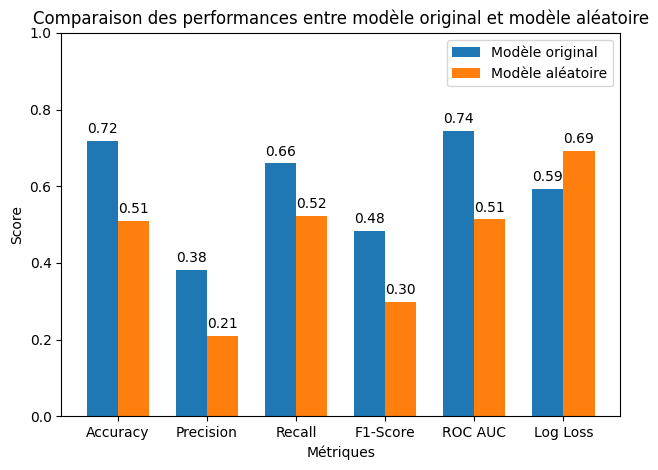

In [ ]:

# Comparaison du modèle original avec le modèle aléatoire
modele.comparer_modeles(model_scores)

##### On observe que les résultats sont pires que ce qu'on a obtenu avec notre modèle Logistic Regression entraîné. Ca veut dire que notre modèle a un pouvoir prédictif et explicatif plus important qu'un modèle purement aléatoire. Notre modèle apporte de la plus-valeur.

In [ ]:
# On entraîne le modèle de régression logistique sur le X_train pour comparer les résultats => voir s'il y a bcp d'overfitting
model = LogisticRegressionModèle()
model.entrainer(X_train_discret, y_train_discret)

# Prédiction et évaluation sur le X_train
y_pred, y_proba = model.predire(X_train_discret)
model.evaluer_resultats(y_train_discret, y_pred, y_proba)
train_scores = model.liste_metriques(y_train_discret, y_pred, y_proba)

Meilleur modèle trouvé avec les paramètres: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Modèle optimal: LogisticRegression(C=0.1, class_weight='balanced', max_iter=10000)
   Metric    Score
 Accuracy 0.737206
Precision 0.401436
   Recall 0.646688
 F1-Score 0.495369
  ROC AUC 0.760965
 Log Loss 0.579911

Matrice de confusion:
 [[2900  917]
 [ 336  615]]


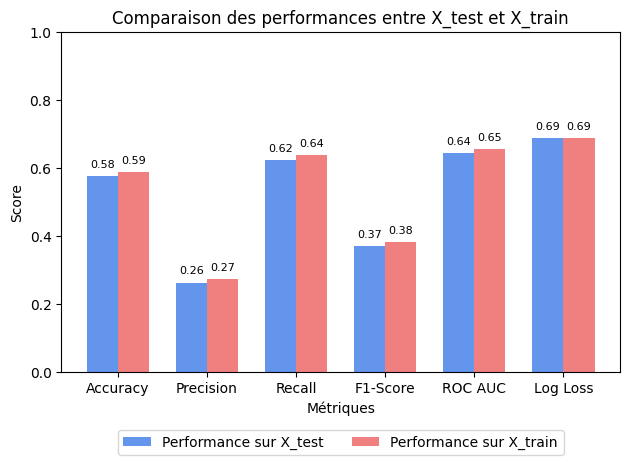

In [ ]:
# On crée un graphique pour comparer la performance de notre modèle sur le X_test et puis sur le X_train
# Si on a un fort overfitting, on s'attendrait que les performances sur le X_train soient bcp plus elevees que celles sur X_test 
# pourquoi ? car les données X_train ont été "vues" par le modèle, qui a été entraîné dessus

modele.comparer_performance_train_test(X_train_discret, y_train_discret, X_test_discret, y_test_discret)

In [ ]:
# On cherche les coefficients de la régrssion logistique et les odd-ratios pour l'analyse du modèle
# Pour cette problématique on va utiliser la librairie statsmodels qui est spécifiquement conçue
# Scikit-learn va être cependant utilisé pour la recherche du meilleur modèle

X_train_discret_statsmodels = sm.add_constant(X_train_discret)
log_reg= sm.Logit(y_train_discret, X_train_discret_statsmodels).fit()

# Wald test
wald_test_global = log_reg.wald_test(" + ".join(log_reg.params.index[1:]) + " = 0")
print(wald_test_global)
#on affiche les coefficients
print(log_reg.summary())

summary_df=pd.DataFrame()
summary_df["Odds Ratios"] = np.exp(log_reg.params)
#on affiche les odd-ratios
print(summary_df)


Optimization terminated successfully.
         Current function value: 0.425361
         Iterations 6
<Wald test (chi2): statistic=[[100.78743892]], p-value=1.0240367687736477e-23, df_denom=1>
                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 4768
Model:                          Logit   Df Residuals:                     4761
Method:                           MLE   Df Model:                            6
Date:                Sat, 26 Oct 2024   Pseudo R-squ.:                  0.1487
Time:                        22:45:46   Log-Likelihood:                -2028.1
converged:                       True   LL-Null:                       -2382.3
Covariance Type:            nonrobust   LLR p-value:                9.498e-150
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
con

/Users/chekalisa/Desktop/scoring_2/.venv/lib/python3.11/site-packages/statsmodels/base/model.py:1912: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(


### On entraîne d'autres modeles : DecisionTree, RandomForest, KNN, GradientBoosting, SVM, Naive Bayes

Entrainement KNN...
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Les meilleurs paramètres pour KNN: {'metric': 'hamming', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Résultats pour le modèle KNN :
   Metric     Score
 Accuracy  0.830537
Precision  0.621622
   Recall  0.386555
 F1-Score  0.476684
  ROC AUC  0.719223
 Log Loss  3.501117
    Model       KNN


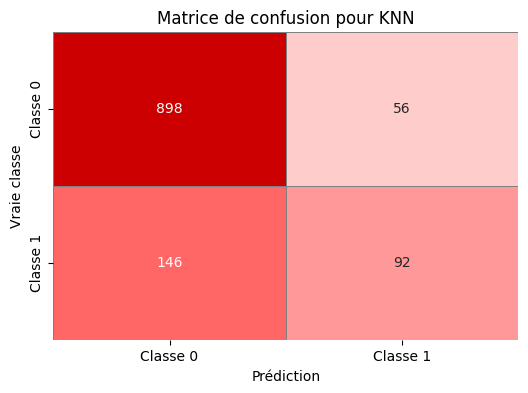

Entrainement KNN...
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Les meilleurs paramètres pour KNN: {'metric': 'manhattan', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Résultats pour le modèle KNN :
   Metric     Score
 Accuracy  0.930369
Precision  0.981366
   Recall  0.663866
 F1-Score   0.79198
  ROC AUC  0.926162
 Log Loss  1.093801
    Model       KNN


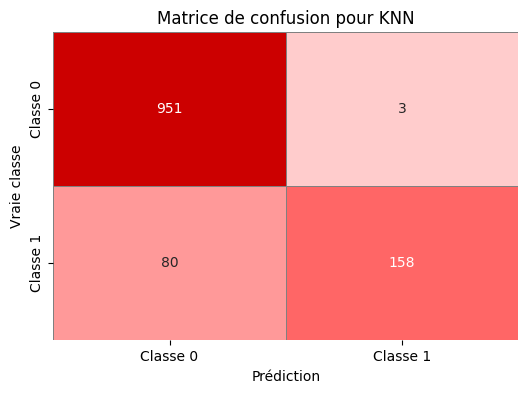

In [ ]:
entrainer = EntrainerModèle()

#on entraîne le KNN sur données discretisées
entrainer.entrainement("KNN", X_train_discret, y_train_discret)
y_pred, y_proba = entrainer.prediction("KNN", X_test_discret)
entrainer.evaluation_stockage("KNN",y_test_discret, y_pred, y_proba)

#on entraîne le KNN sur données standardisées
entrainer.entrainement("KNN", X_train_scaled, y_train_normal)
y_pred, y_proba = entrainer.prediction("KNN", X_test_scaled)
entrainer.evaluation_stockage("KNN",y_test_normal, y_pred, y_proba)


Entrainement SVM...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Les meilleurs paramètres pour SVM: {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}
Résultats pour le modèle SVM :
   Metric     Score
 Accuracy   0.83557
Precision  0.677966
   Recall  0.336134
 F1-Score  0.449438
  ROC AUC  0.730271
 Log Loss  0.424099
    Model       SVM


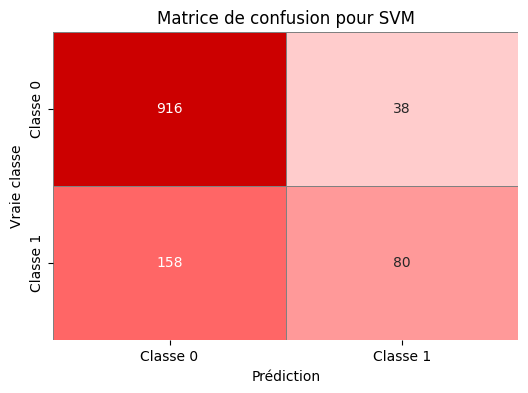

Entrainement SVM...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Les meilleurs paramètres pour SVM: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Résultats pour le modèle SVM :
   Metric     Score
 Accuracy  0.933725
Precision  0.964912
   Recall  0.693277
 F1-Score  0.806846
  ROC AUC  0.923172
 Log Loss  0.214954
    Model       SVM


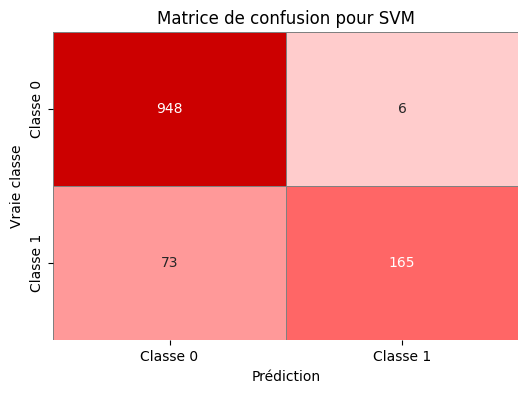

In [ ]:
#on entraîne le SVM sur données discretisées
entrainer.entrainement('SVM', X_train_discret, y_train_discret)
y_pred, y_proba = entrainer.prediction('SVM', X_test_discret)
entrainer.evaluation_stockage('SVM',y_test_discret, y_pred, y_proba)

#on entraîne le SVM sur données standardisées
entrainer.entrainement('SVM', X_train_scaled, y_train_normal)
y_pred, y_proba = entrainer.prediction('SVM', X_test_scaled)
entrainer.evaluation_stockage('SVM',y_test_normal, y_pred, y_proba)

Entrainement DecisionTree...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Les meilleurs paramètres pour DecisionTree: {'max_depth': 10, 'min_samples_split': 10}
Résultats pour le modèle DecisionTree :
   Metric        Score
 Accuracy      0.82802
Precision     0.646018
   Recall     0.306723
 F1-Score     0.415954
  ROC AUC     0.758577
 Log Loss     0.854117
    Model DecisionTree


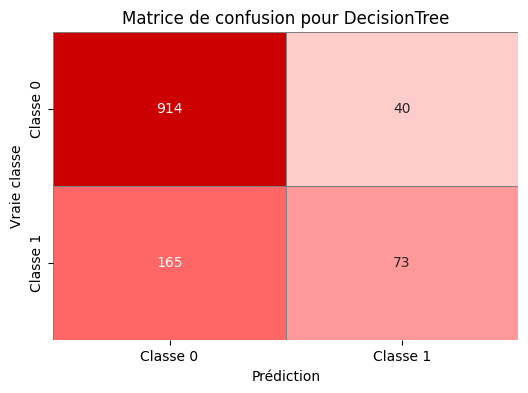

Entrainement DecisionTree...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Les meilleurs paramètres pour DecisionTree: {'max_depth': 10, 'min_samples_split': 2}
Résultats pour le modèle DecisionTree :
   Metric        Score
 Accuracy     0.881711
Precision     0.821192
   Recall     0.521008
 F1-Score     0.637532
  ROC AUC     0.818837
 Log Loss     1.103301
    Model DecisionTree


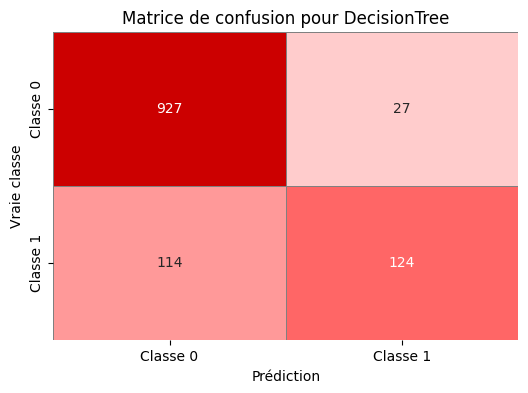

In [ ]:
#on entraîne le DecisionTree sur données discrétisées
entrainer.entrainement('DecisionTree', X_train_discret, y_train_discret)
y_pred, y_proba = entrainer.prediction('DecisionTree', X_test_discret)
entrainer.evaluation_stockage('DecisionTree',y_test_discret, y_pred, y_proba)

#on entraîne le DecisionTree sur données standardisées
entrainer.entrainement('DecisionTree', X_train_scaled, y_train_normal)
y_pred, y_proba = entrainer.prediction('DecisionTree', X_test_scaled)
entrainer.evaluation_stockage('DecisionTree',y_test_normal, y_pred, y_proba)


Entrainement RandomForest...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Les meilleurs paramètres pour RandomForest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Résultats pour le modèle RandomForest :
   Metric        Score
 Accuracy     0.841443
Precision     0.684211
   Recall     0.382353
 F1-Score     0.490566
  ROC AUC     0.801708
 Log Loss     0.640104
    Model RandomForest


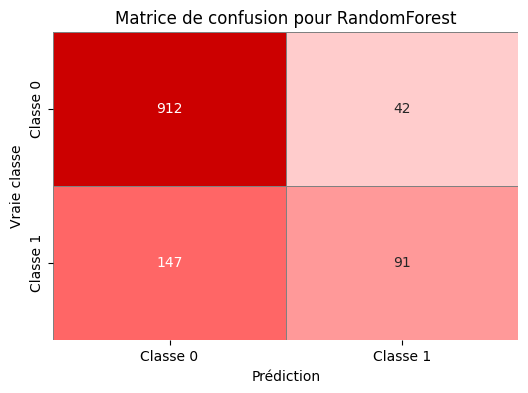

Entrainement RandomForest...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Les meilleurs paramètres pour RandomForest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Résultats pour le modèle RandomForest :
   Metric        Score
 Accuracy     0.922819
Precision     0.993243
   Recall     0.617647
 F1-Score     0.761658
  ROC AUC     0.966382
 Log Loss     0.211679
    Model RandomForest


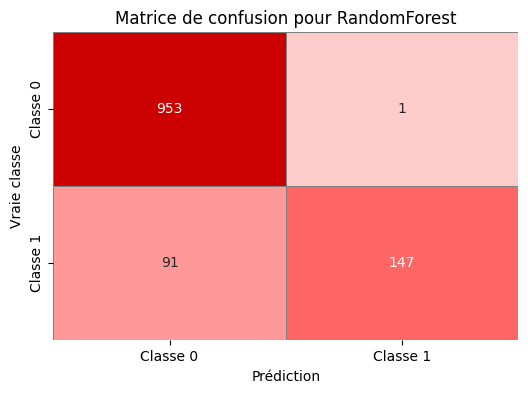

In [ ]:
#on entraîne le RandomForest sur les données discrétisées
entrainer.entrainement('RandomForest', X_train_discret, y_train_discret)
y_pred, y_proba = entrainer.prediction('RandomForest', X_test_discret)
entrainer.evaluation_stockage('RandomForest',y_test_discret, y_pred, y_proba)

#on entraîne le RandomForest sur les données standardisées
entrainer.entrainement('RandomForest', X_train_scaled, y_train_normal)
y_pred, y_proba = entrainer.prediction('RandomForest', X_test_scaled)
entrainer.evaluation_stockage('RandomForest',y_test_normal, y_pred, y_proba)

Entrainement NaiveBayes...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Les meilleurs paramètres pour NaiveBayes: {'var_smoothing': 1e-09}
Résultats pour le modèle NaiveBayes :
   Metric      Score
 Accuracy   0.786074
Precision    0.44586
   Recall   0.294118
 F1-Score    0.35443
  ROC AUC   0.744695
 Log Loss   0.507908
    Model NaiveBayes


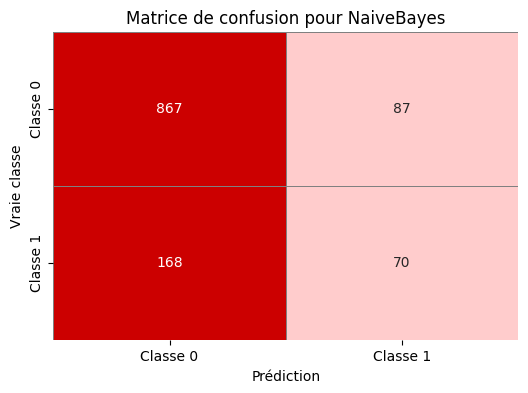

Entrainement NaiveBayes...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Les meilleurs paramètres pour NaiveBayes: {'var_smoothing': 1e-09}
Résultats pour le modèle NaiveBayes :
   Metric      Score
 Accuracy   0.791107
Precision   0.472362
   Recall   0.394958
 F1-Score   0.430206
  ROC AUC   0.767276
 Log Loss   1.058542
    Model NaiveBayes


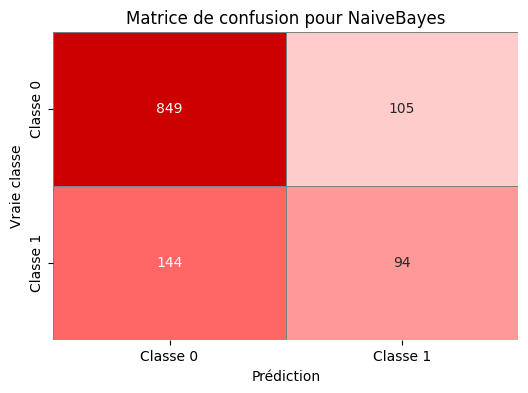

In [ ]:
#on entraîne le NaiveBayes sur les données discrétisées
entrainer.entrainement('NaiveBayes', X_train_discret, y_train_discret)
y_pred, y_proba = entrainer.prediction('NaiveBayes', X_test_discret)
entrainer.evaluation_stockage('NaiveBayes',y_test_discret, y_pred, y_proba)

#on entraîne le NaiveBayes sur les données standardisées
entrainer.entrainement('NaiveBayes', X_train_scaled, y_train_normal)
y_pred, y_proba = entrainer.prediction('NaiveBayes', X_test_scaled)
entrainer.evaluation_stockage('NaiveBayes',y_test_normal, y_pred, y_proba)

Entrainement GradientBoosting...
Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Les meilleurs paramètres pour GradientBoosting: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300, 'subsample': 0.8}
Résultats pour le modèle GradientBoosting :
   Metric            Score
 Accuracy         0.842282
Precision         0.695312
   Recall          0.37395
 F1-Score         0.486339
  ROC AUC         0.802677
 Log Loss         0.392621
    Model GradientBoosting


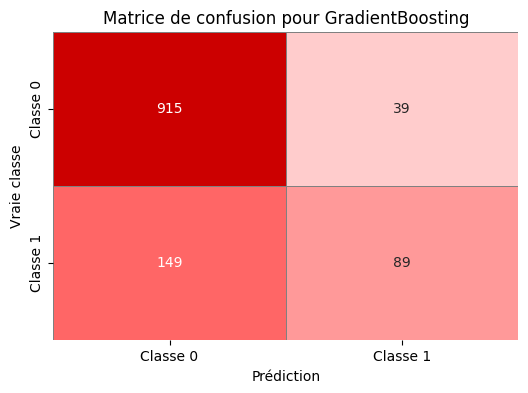

Entrainement GradientBoosting...
Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Les meilleurs paramètres pour GradientBoosting: {'learning_rate': 0.2, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300, 'subsample': 0.8}
Résultats pour le modèle GradientBoosting :
   Metric            Score
 Accuracy         0.927852
Precision         0.957831
   Recall         0.668067
 F1-Score         0.787129
  ROC AUC         0.947012
 Log Loss         0.250214
    Model GradientBoosting


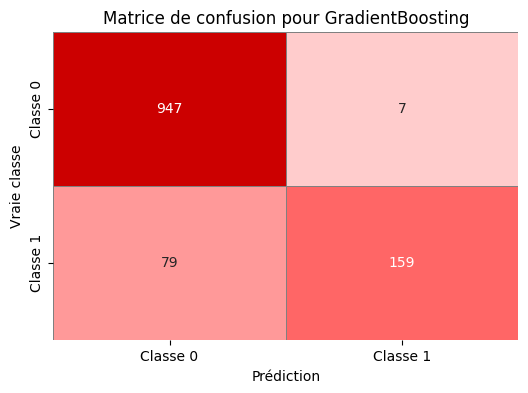

In [ ]:

#on entraîne le GradientBoosting sur les données discrétisées
entrainer.entrainement('GradientBoosting', X_train_discret, y_train_discret)
y_pred, y_proba = entrainer.prediction('GradientBoosting', X_test_discret)
entrainer.evaluation_stockage('GradientBoosting',y_test_discret, y_pred, y_proba)

#on entraîne le GradientBoosting sur les données standardisées
entrainer.entrainement('GradientBoosting', X_train_scaled, y_train_normal)
y_pred, y_proba = entrainer.prediction('GradientBoosting', X_test_scaled)
entrainer.evaluation_stockage('GradientBoosting',y_test_normal, y_pred, y_proba)

In [ ]:
# Affichage des métriques pour tous les modèles
df_metriques = entrainer.metriques_dataframe()
print(df_metriques)

    Accuracy  Precision    Recall  F1-Score   ROC AUC  Log Loss  \
0   0.830537   0.621622  0.386555  0.476684  0.719223  3.501117   
1   0.930369   0.981366  0.663866  0.791980  0.926162  1.093801   
2   0.835570   0.677966  0.336134  0.449438  0.730271  0.424099   
3   0.933725   0.964912  0.693277  0.806846  0.923172  0.214954   
4   0.828020   0.646018  0.306723  0.415954  0.758577  0.854117   
5   0.881711   0.821192  0.521008  0.637532  0.818837  1.103301   
6   0.841443   0.684211  0.382353  0.490566  0.801708  0.640104   
7   0.922819   0.993243  0.617647  0.761658  0.966382  0.211679   
8   0.786074   0.445860  0.294118  0.354430  0.744695  0.507908   
9   0.791107   0.472362  0.394958  0.430206  0.767276  1.058542   
10  0.843121   0.697674  0.378151  0.490463  0.802105  0.398069   
11  0.842282   0.695312  0.373950  0.486339  0.802677  0.392621   
12  0.927852   0.957831  0.668067  0.787129  0.947012  0.250214   

               Model  
0                KNN  
1              

    Accuracy  Precision    Recall  F1-Score   ROC AUC  Log Loss  \
5   0.881711   0.821192  0.521008  0.637532  0.818837  1.103301   
12  0.927852   0.957831  0.668067  0.787129  0.947012  0.250214   
1   0.930369   0.981366  0.663866  0.791980  0.926162  1.093801   
9   0.791107   0.472362  0.394958  0.430206  0.767276  1.058542   
7   0.922819   0.993243  0.617647  0.761658  0.966382  0.211679   
3   0.933725   0.964912  0.693277  0.806846  0.923172  0.214954   

               Model  
5       DecisionTree  
12  GradientBoosting  
1                KNN  
9         NaiveBayes  
7       RandomForest  
3                SVM  


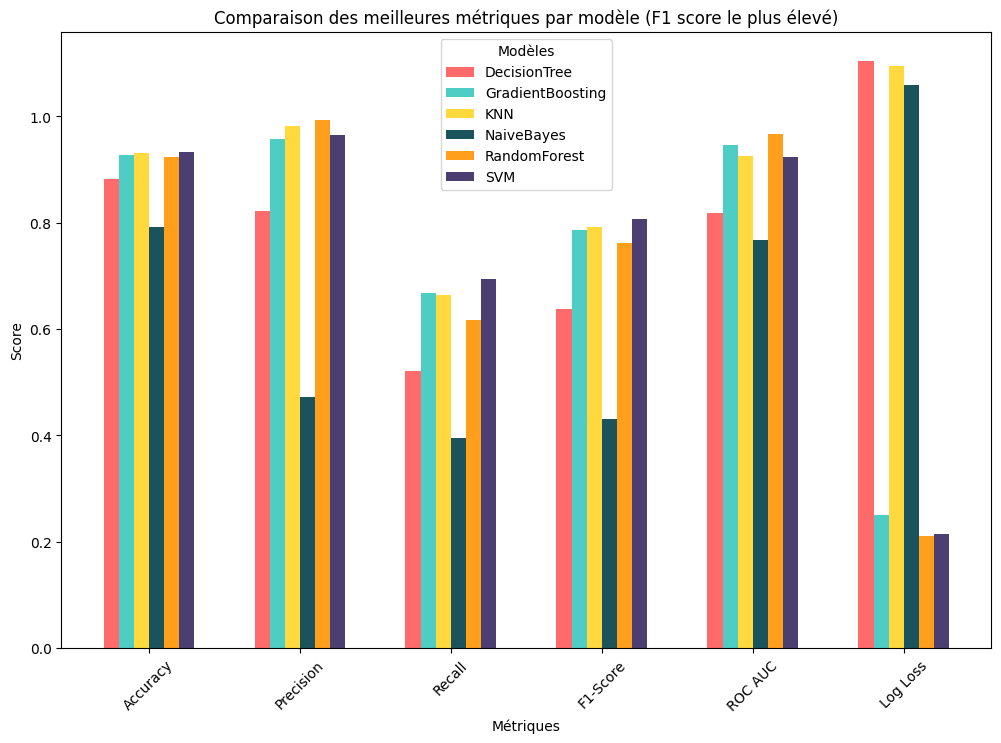

In [ ]:

meilleures_metriques_par_modele = df_metriques.loc[df_metriques.groupby('Model')['F1-Score'].idxmax()]

#on affiche le DataFrame sélectionné (meilleures métriques pour chaque modèle)
print(meilleures_metriques_par_modele)

metriques_a_afficher = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC', 'Log Loss']
modeles = meilleures_metriques_par_modele['Model'].unique()
couleurs = ['#FF6B6B', '#4ECDC4', '#FFD93D', '#1A535C', '#FF9F1C', '#4B3F72']
couleur_modele = dict(zip(modeles, couleurs[:len(modeles)]))

#axe Ox-metriques
x = np.arange(len(metriques_a_afficher))
width = 0.1

plt.figure(figsize=(12, 8))
for i, modele in enumerate(modeles):
    modele_info = meilleures_metriques_par_modele[meilleures_metriques_par_modele['Model'] == modele]
    values = modele_info[metriques_a_afficher].values.flatten() 
    plt.bar(x + i * width, values, width, label=modele, color=couleur_modele[modele])

#on ajoute des labels et titres
plt.xlabel('Métriques')
plt.ylabel('Score')
plt.title('Comparaison des meilleures métriques par modèle (F1 score le plus élevé)')
plt.xticks(x + width * (len(modeles) - 1) / 2, metriques_a_afficher, rotation=45)
plt.legend(title="Modèles")
plt.show()


# Grille de score

In [36]:
train = train_binned
test = test_binned

In [37]:
#Appliquer sur train set
modele_train = ModeleGrilleDeScore(train, cible='BAD', score_base=500, facteur=20)
grille_de_score_train, scores_train, resultat_modele_train = modele_train.ajuster()
fpr_train, tpr_train, roc_auc_train = modele_train.calculer_roc_auc_gini()

Optimization terminated successfully.
         Current function value: 0.379252
         Iterations 7
AUC: 0.8256774786106872
Gini Coefficient: 0.6513549572213744


In [38]:
#Appliquer sur test set
modele_test = ModeleGrilleDeScore(test, cible='BAD', score_base=500, facteur=20)
grille_de_score_test, scores_test, resultat_modele_test = modele_test.ajuster()
fpr_test, tpr_test, roc_auc_test = modele_test.calculer_roc_auc_gini()

Optimization terminated successfully.
         Current function value: 0.385976
         Iterations 7
AUC: 0.8111445836196114
Gini Coefficient: 0.6222891672392228


In [39]:
grille_de_score_test.columns

Index(['Variable', 'Valeur', 'Coefficient', 'Points', 'Fréquence (%)',
       'Contribution (%)', 'Taux de défaut'],
      dtype='object')

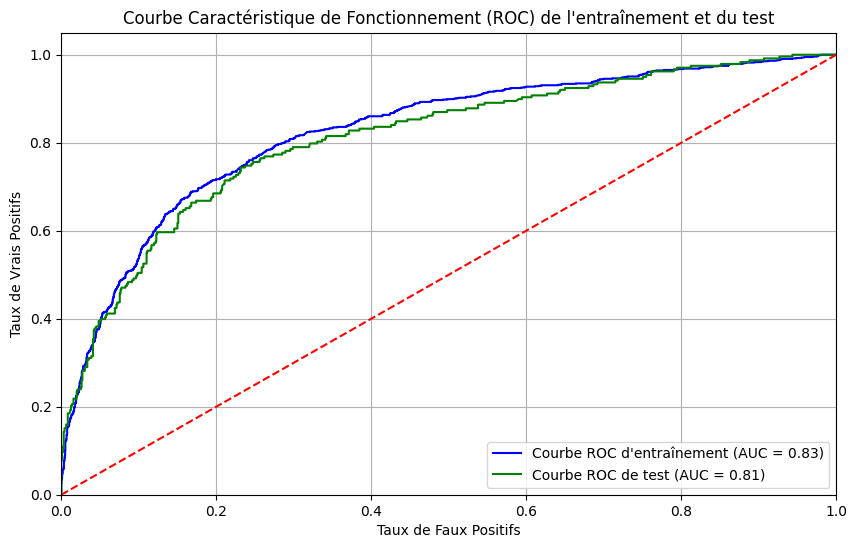

In [40]:
ModeleGrilleDeScore.plot_roc_curve(fpr_train, tpr_train, roc_auc_train, fpr_test, tpr_test, roc_auc_test)

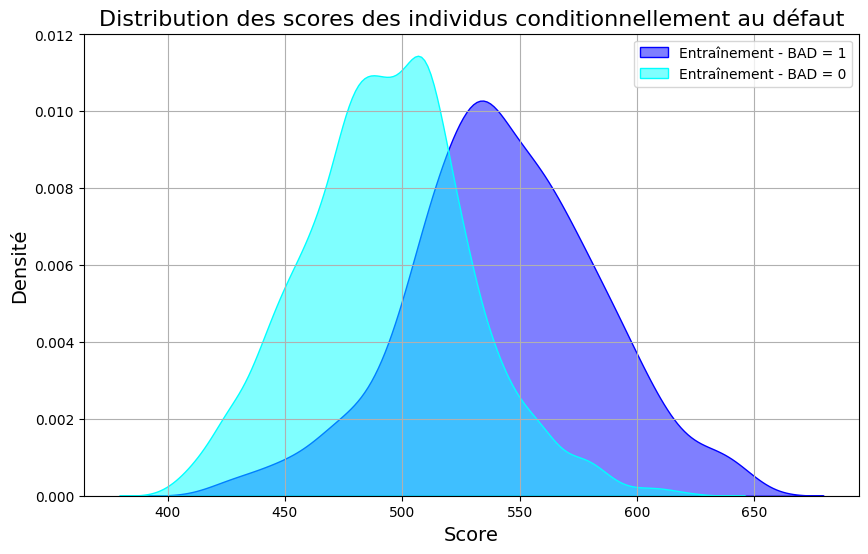

In [41]:
ModeleGrilleDeScore.plot_densite_conditionnelle(train)
